## 1) Data Loading and reading

In [ ]:
pip install WordCloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Reading excel dataset into dataframe
df = pd.read_excel('zappos_men.xlsx')

In [ ]:
df.head()

In [ ]:
df.info()

In [3]:
#checking null values
df.isnull().sum()

web-scraper-order          0
web-scraper-start-url      0
link to shoes              0
link to shoes-href         0
brand                      0
model                      0
price                      0
truetosize               747
truetowidth              747
linktoreviews            567
linktoreviews-href       567
overall                  567
reviews                  570
dates                    567
name                     569
dtype: int64

## 2) Data Cleaning and modification

In [4]:
# Extract the numeric part (digits) from the overall column
df['Rating_star'] = df['overall'].str.extract(r'(\d+)')

In [5]:
#Droppings irrelevant columns
df.drop(['web-scraper-start-url','link to shoes', 'link to shoes-href', 'overall', 'linktoreviews-href', 'linktoreviews'], axis=1, inplace=True)

In [6]:
# dropping all null values 
df.dropna(inplace=True)

#reset index 
df.reset_index(drop =True, inplace=True)

In [ ]:
df.info()

### 2a) Modifying data types 

In [7]:
# Remove the '$' sign in price column and convert to numeric
df['price'] = df['price'].str.replace('$', '', regex=False).astype(float)


# Convert to dates column to datetime
df['dates'] = pd.to_datetime(df['dates'])

# Convert a Rating_star column from object to int
df['Rating_star'] = df['Rating_star'].astype(int)

# Convert to float and handle errors
df['truetosize'] = pd.to_numeric(df['truetosize'].str.rstrip('%'), errors='coerce') / 100
df['truetowidth'] = pd.to_numeric(df['truetowidth'].str.rstrip('%'), errors='coerce') / 100



In [9]:
#Adding a custom sentiment column

# Define bins and labels
bins = [0, 2, 3, 5]  # 1-2, 3, 4-5
labels = ['Negative', 'Neutral', 'Positive']

# Create the sentiment column
df['sentiment'] = pd.cut(df['Rating_star'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
#checking our cleaned dataset for EDA
df.info()

In [ ]:
df

## 3) Exploratory Data Analysis

### 3a) Univariate Analysis

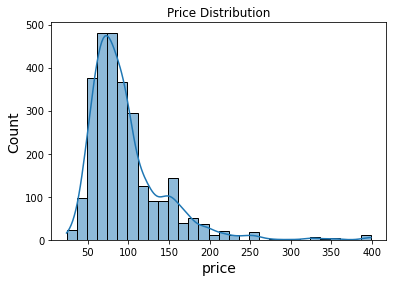

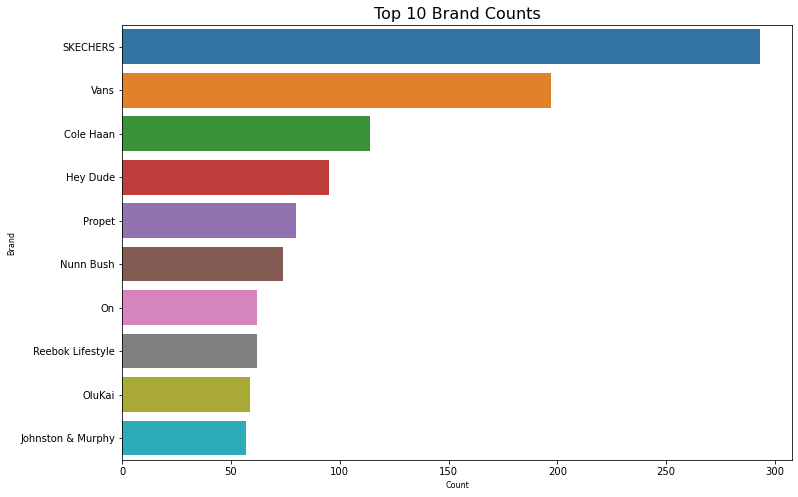

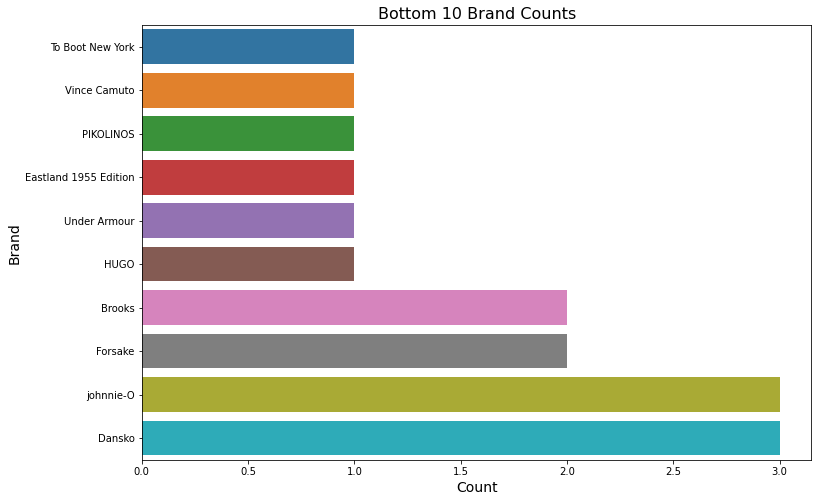

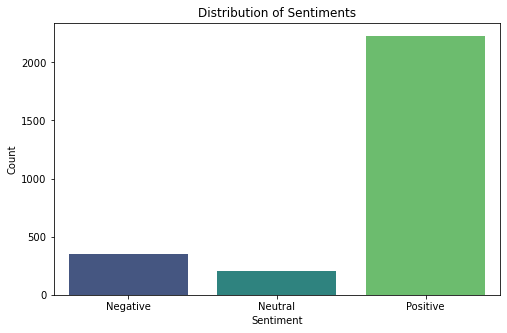

In [10]:
# Distribution of prices
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Count of top 10 brands

top_brands = df['brand'].value_counts().nlargest(10).index  # Get top 20 brands

plt.figure(figsize=(12, 8))
sns.countplot(y=df[df['brand'].isin(top_brands)]['brand'], order=top_brands)
plt.title('Top 10 Brand Counts', fontsize=16)
plt.xlabel('Count', fontsize=8)
plt.ylabel('Brand', fontsize=8)
plt.show()

# Count the 1b0 least frequent brands
bottom_brands = df['brand'].value_counts().nsmallest(10).index  

plt.figure(figsize=(12, 8))
sns.countplot(y=df[df['brand'].isin(bottom_brands)]['brand'], order=bottom_brands)
plt.title('Bottom 10 Brand Counts', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


# Distribution of sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 3b) Bivariate Analysis

#### Brands with the highest and lowest average rating

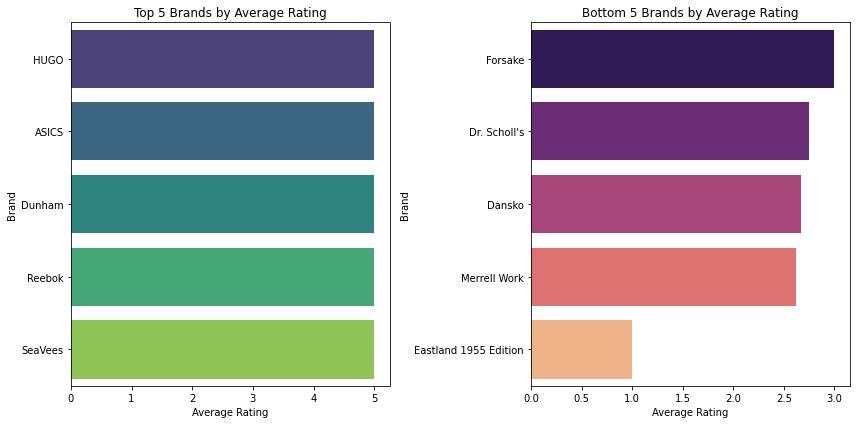

In [11]:
# Group by brand and calculate mean rating
average_ratings = df.groupby('brand')['Rating_star'].mean().reset_index()

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by='Rating_star', ascending=False)

# Top 5 brands with highest average ratings
top_5_brands = average_ratings.head(5)

# Bottom 5 brands with lowest average ratings
bottom_5_brands = average_ratings.tail(5)


# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot for top 5 brands
plt.subplot(1, 2, 1)
sns.barplot(x='Rating_star', y='brand', data=top_5_brands, palette='viridis')
plt.title('Top 5 Brands by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Brand')

# Plot for bottom 5 brands
plt.subplot(1, 2, 2)
sns.barplot(x='Rating_star', y='brand', data=bottom_5_brands, palette='magma')
plt.title('Bottom 5 Brands by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Brand')

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Average rating by sentiment

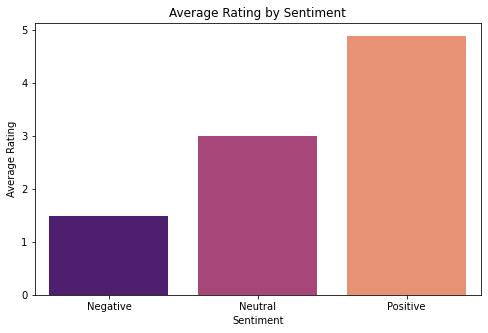

In [12]:
# This is to validate whether the sentiment labels align with the ratings.

# Calculate average rating for each sentiment
average_rating_by_sentiment = df.groupby('sentiment')['Rating_star'].mean()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=average_rating_by_sentiment.index, y=average_rating_by_sentiment.values, palette='magma')
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

#### Sentiment overtime

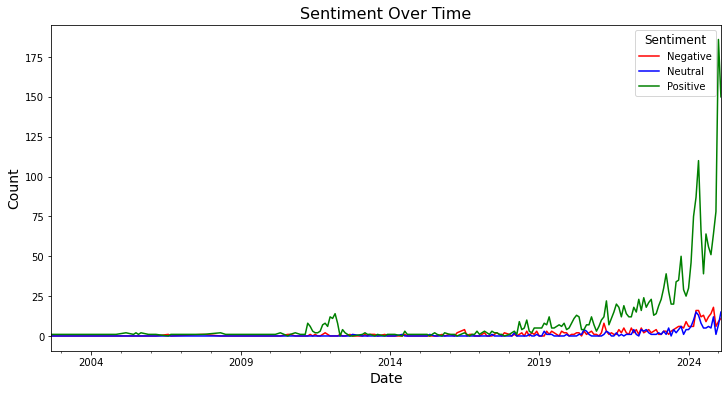

In [13]:
# Group by date and sentiment, then count occurrences
sentiment_over_time = df.groupby([df['dates'].dt.to_period('M'), 'sentiment']).size().unstack()

# Define custom colors for each sentiment
colors = {
    'Positive': 'green',  # Green for positive sentiment
    'Neutral': 'blue',    # Blue for neutral sentiment
    'Negative': 'red'     # Red for negative sentiment
}

# Plot the results with custom colors
ax = sentiment_over_time.plot(kind='line', figsize=(12, 6), color=[colors[s] for s in sentiment_over_time.columns])

# Add title and labels
plt.title('Sentiment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize legend
plt.legend(title='Sentiment', title_fontsize=12, fontsize=10)

# Show the plot
plt.show()

#### Create word cloud for each sentiment

In [14]:

sentences = df['reviews'].tolist()
len(sentences)

2781

In [15]:
sentences_as_one_sentence = ''.join(sentences)
sentences_as_one_sentence

'Bought these for my son and he LOVES them!!! He wears them almost every day! I will definitely be buying him another pair for Christmas.I get lots of compliments for these .I love my Dude\'s!Love these!!Probably my favoriteArizona colors. Love them!Love the colors and fitVery comfy!These black gravel Wally\'s are great. They are a heavy canvas , awesome black sole, run true to size. I wear an 11. They can be worn with jeans, shorts, or dress pants.Well made, reasonably priced, comfortable shoes! And unique style!I finally found the shoes I was looking for…comfortable, breathable, lace-up,  & made for my hard-to-fit long & narrow feet. Thanks, ZAPPO’s!\nJBBought these shoes for walking around the neighborhood and on trails. Wanted a lightweight comfortable shoe with good grip. This shoe was exactly it! Gives me all the support of a boot without having the heavy weight of one.Great fitment, amazing support and worth the purchase. If you are looking fir a comfortable shoe to be outside i

In [16]:
# Path to the downloaded Roboto font
font_path = 'Lato.ttf'  # Replace with the actual path

# Combine all sentences into one string
sentences_as_one_sentence = " ".join(df['reviews'])  # Replace 'reviews' with your text column

# Generate the word cloud with the custom font
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    font_path=font_path  # Specify the font path here
).generate(sentences_as_one_sentence)

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

OSError: cannot open resource